Gerekli kütüphaneler aşağıda verilmiştir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LR import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data okunması ve Gender sütununun atılması görülmektedir.

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv') 
data = data.drop('Gender', axis=1)

### Veri setinin keşifsel veri analizi (EDA)
EDA gerçekleştirildi. Datanın istatistiksel değerleri yazıldı. Korelasyon matrisi, pair plots ve line plot çizdirildi. Aşağıda ortalama, standart sapma, min değer ve max değer gibi bilgiler görülmekte.

In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Aşağıda korelasyon matrisi gözlenmekte. Bu matrise göre boy ve kilo arasında çok düşük miktarda bir korelasyon olduğu görülmüştür. Bundan farklı olarak vücut kitle indeksi ile kilo yüksek değerde bir pozitif korelasyon gösterirken vücut kitle indeksi ile boy negatif korelasyon göstermiştir.

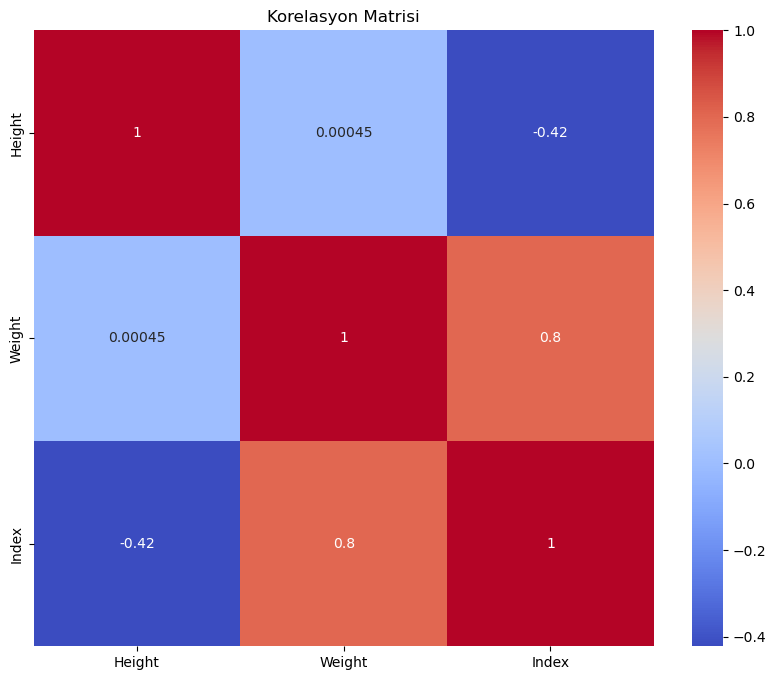

In [4]:
data_correlation = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

İkili grafiklerine baktığımız zaman aralarında lineer bir ilişki olduğu gözlenmekte. Doğrusal çizgiler ile index değerleri birbirlerinden ayrılabilir gözükmekte. 

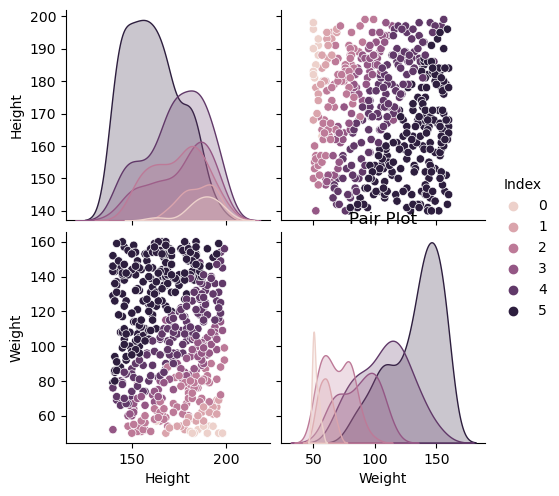

In [5]:
sns.pairplot(data, hue="Index")
plt.title("Pair Plot")
plt.show()

İkisinin ayrı ayrı çizgi grafiklerine baktığımızda da doğrusal bir ilişki gözlenebilmekte. Ağırlık ile olan lineer ilişki boya oranla çok daha yüksektir. Korelasyon matrisi ile burdaki grafiklerin birbirini doğruladığını görebiliriz.

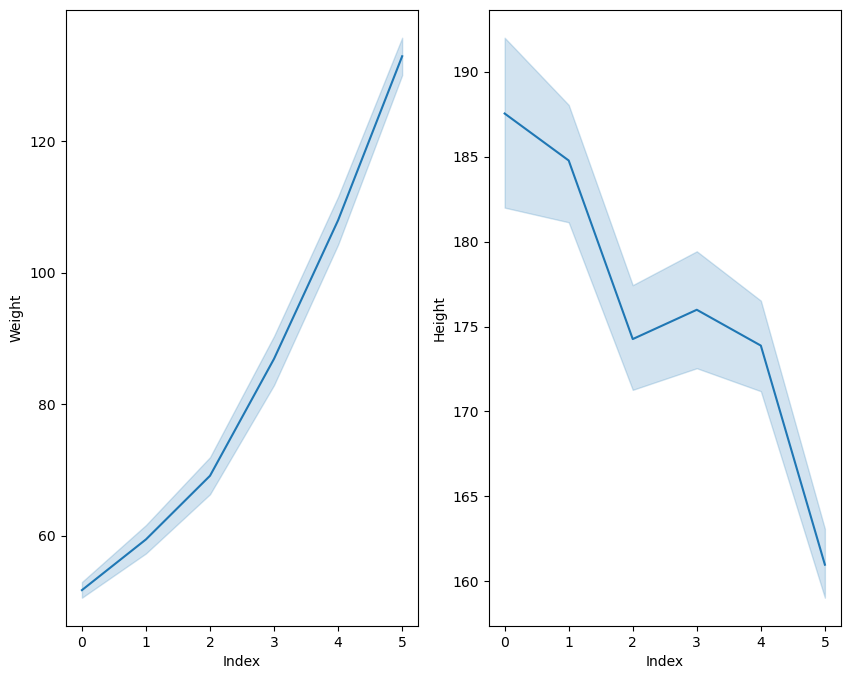

In [6]:
fig, ax= plt.subplots(1,2, figsize=(10,8))
sns.lineplot(x=data['Index'], y=data['Weight'], ax=ax[0])
sns.lineplot(x=data['Index'], y=data['Height'], ax=ax[1])
plt.show()

Buradaki grafiklerde ise daha çok data noktaları incelenmekte. Kilo ve boy arasında doğrudan bir ilişki gözlenemese de vücut kitle indeksi ile boy ve kilo arasında oldukça doğrusal bir ilişki gözlenmektedir. 
Ayrıca her iki girdiyi de alarak çizdirdiğimiz 3d grafik üzerinden çok bir bilgi okunamasa da görsellik açısından veri noktalarının daha iyi anlaşılması sağlanmıştır.

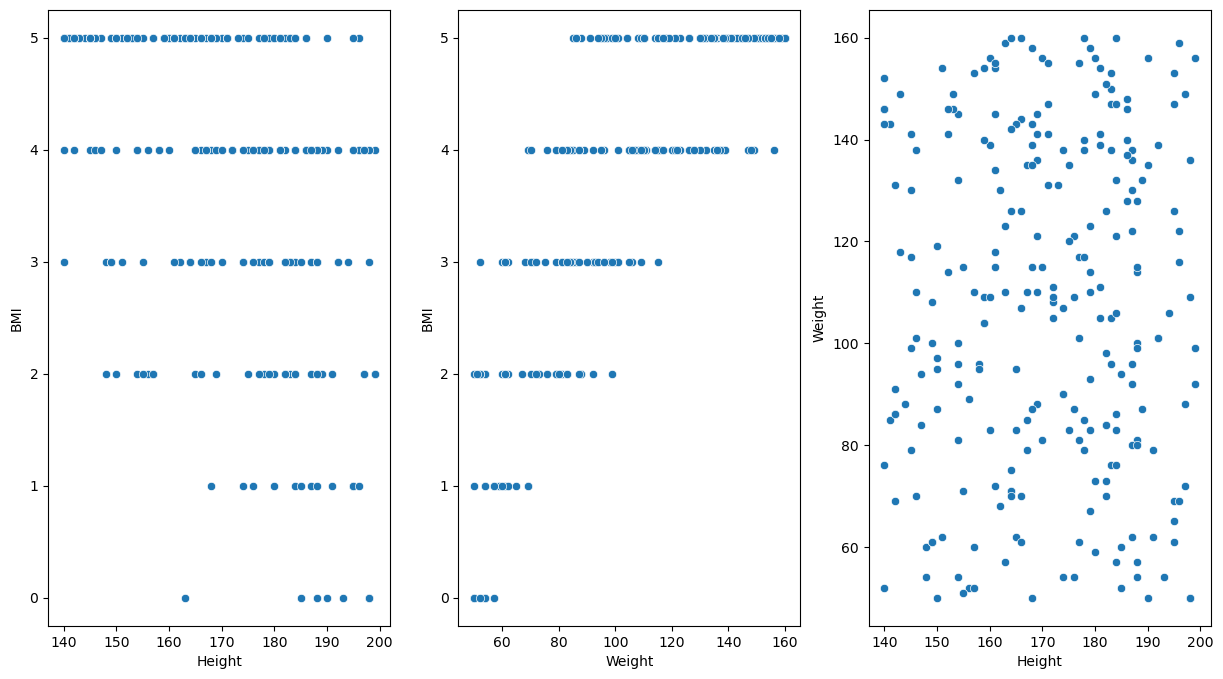

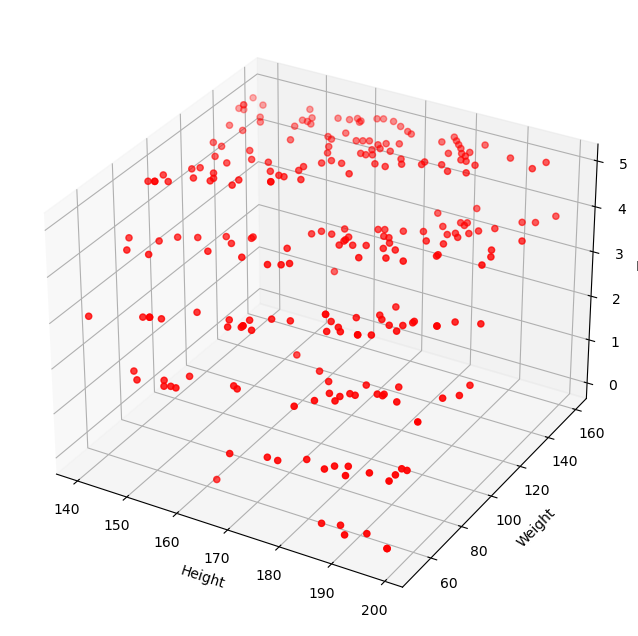

In [7]:
data_list = data.values.tolist()
X = [row[:2]for row in data_list]
y = [row[2:3]for row in data_list]
y = [item for sublist in y for item in sublist]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
height = [row[0]for row in X_train]
weight = [row[1]for row in X_train]

fig, ax= plt.subplots(1,3, figsize=(15,8))
sns.scatterplot(x=height, y=y_train, ax=ax[0])
ax[0].set_xlabel('Height')
ax[0].set_ylabel('BMI')
sns.scatterplot(x=weight, y=y_train, ax=ax[1])
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('BMI')
sns.scatterplot(x=height, y=weight, ax=ax[2])
ax[2].set_xlabel('Height')
ax[2].set_ylabel('Weight')  
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(height, weight, y_train, c='r', marker='o')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')
plt.show()

### Sınıflandırıcının eğitimi
Tanımlanan lineer regresyon class'ı kullanılarak ve ödevde verilen parametrelerle eğitim yapılmaktadır. Modelin başarımının ölçüsünü belirleyebilmek için test verileri üzerinden tahmin yapılmaktadır. Son olarak da modelin performans ölçümü için R2-score MSE MAE RMSE değerleri hesaplanmıştır. Bu hesaplanan değerlerden R2-score en çok kullanılandır. 0 ve 1 arasında değer almaktadır. Kullanılan farklı modelleri kıyaslamak için sıklıkla kullanılır. Eğitilen modelde R2-score değeri 0.63 gelmiş olup iyi eğitilmiş bir model olduğunu göstermektedir. 

In [8]:
lr = LinearRegression(learning_rate=0.000005, num_epochs=1000)
lr.fit(height, weight, y_train)
new_height = [row[0]for row in X_test]
new_weight = [row[1]for row in X_test]
y_pred = lr.predict(new_height, new_weight)
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Epoch: 1000 - Prediction: 3.5531566655352194
Epoch: 1000 - Prediction: 2.384061253108029
Epoch: 1000 - Prediction: 3.1948292052714757
Epoch: 1000 - Prediction: 3.495386379764411
Epoch: 1000 - Prediction: 4.917959097540316
Epoch: 1000 - Prediction: 5.600395343532225
Epoch: 1000 - Prediction: 5.042042661052706
Epoch: 1000 - Prediction: 5.383260784048661
Epoch: 1000 - Prediction: 2.712441534821582
Epoch: 1000 - Prediction: 5.687027418862197
Epoch: 1000 - Prediction: 3.5274809829704155
Epoch: 1000 - Prediction: 3.261165836339299
Epoch: 1000 - Prediction: 2.087775574600481
Epoch: 1000 - Prediction: 4.3222016335308595
Epoch: 1000 - Prediction: 4.387452875607655
Epoch: 1000 - Prediction: 2.10169880487391
Epoch: 1000 - Prediction: 5.567238704661434
Epoch: 1000 - Prediction: 4.291192419315882
Epoch: 1000 - Prediction: 3.308198998831038
Epoch: 1000 - Prediction: 4.392809760584069
Epoch: 1000 - Prediction: 1.8022036660457619
Epoch: 1000 - Prediction: 5.342623188871882
Epoch: 1000 - Prediction: 1.

### Sonuçların yorumlanması
Ne kadar epoch yapılmasını kontrol etmek için 1'den 1000e kadar epoch sayısını değiştirerek model döngü içinde eğitilmiştir ve her epoch değeri için loss ve accuracy değerleri hem train hem test verileri için dizilere kaydedilmiştir.

In [9]:
# bu hücre 1 dakika 15 saniye kadar sürmektedir.
loss_train = []
accuracy_train = []
loss_test = []
accuracy_test = []
epoch = [x for x in range(10, 1001, 10)]
for i in epoch:
    if i % 10 == 0:
        lr = LinearRegression(learning_rate=0.000005, num_epochs=i)
        lr.fit(height, weight, y_train)
        new_height = [row[0]for row in X_test]
        new_weight = [row[1]for row in X_test]
        y_pred_test = lr.predict(new_height, new_weight)
        y_pred_train = lr.predict(height, weight)
        loss_train.append(mean_squared_error(y_train, y_pred_train))
        accuracy_train.append(r2_score(y_train, y_pred_train))
        loss_test.append(mean_squared_error(y_test, y_pred_test))
        accuracy_test.append(r2_score(y_test, y_pred_test))


Epoch: 500 - Prediction: 3.545711266936934
Epoch: 500 - Prediction: 1.7924473887243806
Epoch: 500 - Prediction: 2.9497772638429542
Epoch: 500 - Prediction: 3.3198587240276987
Epoch: 500 - Prediction: 5.158527532768586
Epoch: 500 - Prediction: 6.417854058471067
Epoch: 500 - Prediction: 5.442395191112874
Epoch: 500 - Prediction: 6.0720584539641145
Epoch: 500 - Prediction: 2.3719211975957903
Epoch: 500 - Prediction: 6.454687277643816
Epoch: 500 - Prediction: 3.4453323589772737
Epoch: 500 - Prediction: 3.3097379744691113
Epoch: 500 - Prediction: 1.3384472148025448
Epoch: 500 - Prediction: 4.539925416621061
Epoch: 500 - Prediction: 4.694406609288163
Epoch: 500 - Prediction: 1.59411618674143
Epoch: 500 - Prediction: 6.388846500753541
Epoch: 500 - Prediction: 4.619931299630541
Epoch: 500 - Prediction: 2.990523313743315
Epoch: 500 - Prediction: 4.815967413510127
Epoch: 500 - Prediction: 1.1275686493246366
Epoch: 500 - Prediction: 6.114422246488721
Epoch: 500 - Prediction: 1.0883088162155177
Ep

Önceki kısımda kaydedilen loss ve accuracy değerleri görselleştirilmiştir. Grafiklerden de anlaşılacağı üzere 500 epoch'dan sonra anlamlı bir iyileşme meydana gelmemektedir. Hesaplama kolaylığı ve model doğruluğu arasındaki ödünleşme sonucunda eğitimi 500 epoch ile yapmak daha isabetli olacaktır. Ayrıca train ve test için ayrı ayrı çizilmesine rağmen birbirlerini oldukça iyi takip etmişlerdir, birbirleriyle tutarlı sonuç vermişlerdir. Bunu sebebi train datası ile test datasının birbirleriyle oldukça uyum içinde olmalarıdır.

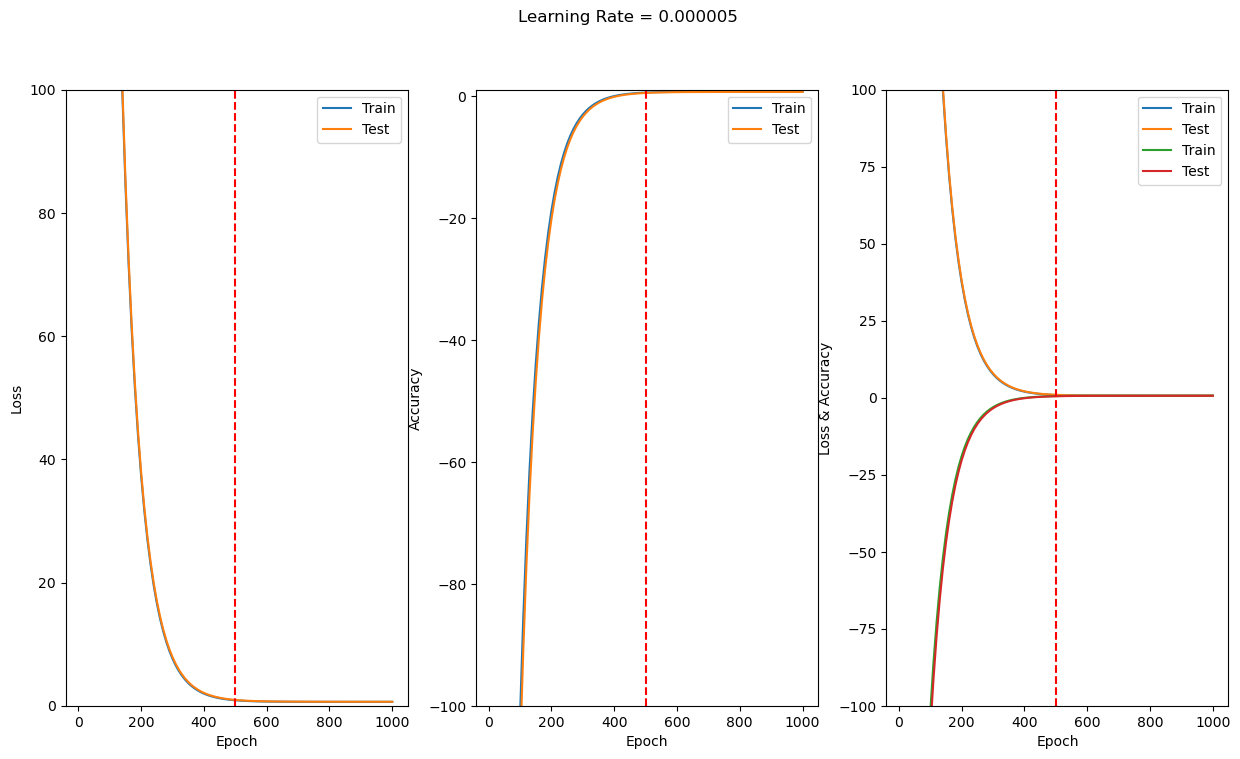

In [10]:
fig, ax= plt.subplots(1,3, figsize=(15,8)) 
fig.suptitle('Learning Rate = 0.000005')
ax[0].plot(epoch, loss_train, label='Train')
ax[0].plot(epoch, loss_test, label='Test')
ax[0].set_ylim([0, 100])
ax[0].axvline(x=500, color='r', linestyle='--')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epoch, accuracy_train, label='Train')
ax[1].plot(epoch, accuracy_test, label='Test')
ax[1].set_ylim([-100, 1])
ax[1].axvline(x=500, color='r', linestyle='--')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[2].plot(epoch, loss_train, label='Train')
ax[2].plot(epoch, loss_test, label='Test')
ax[2].plot(epoch, accuracy_train, label='Train')
ax[2].plot(epoch, accuracy_test, label='Test')
ax[2].set_ylim([-100, 100])
ax[2].axvline(x=500, color='r', linestyle='--')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss & Accuracy')
ax[2].legend()
plt.show()
